<a href="https://colab.research.google.com/github/G-Shino/colab_tutorial/blob/master/20190715_%E6%95%B0%E5%80%A4%E8%A7%A3%E6%9E%90%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numba import jit, f8

def TDMAsolver(a, b, c, d):
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        	    
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [0]:
A = np.array([[10,2,0,0],[3,10,4,0],[0,1,7,5],[0,0,3,4]],dtype=float)

a = np.array([3.,1,3])
b = np.array([10.,10.,7.,4.])
c = np.array([2.,4.,5.])
d = np.array([3,4,5,6.])

print("Test results:")
print(TDMAsolver(a, b, c, d))
print(np.linalg.solve(A, d))

Test results:
[ 0.14877589  0.75612053 -1.00188324  2.25141243]
[ 0.14877589  0.75612053 -1.00188324  2.25141243]


In [1]:
import numpy as np
A = np.array([[2, -1, 0, 0, 0], [-1, 2, -1, 0, 0], [0, -1, 2, -1, 0], [0, 0, -1, 2, -1], [0, 0, 0, -1, 2]])
print(A)

[[ 2 -1  0  0  0]
 [-1  2 -1  0  0]
 [ 0 -1  2 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  2]]


In [2]:
np.linalg.inv(A) @ np.array([0, 0, 0, 0, 1])

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333])

# 問題1

In [4]:
import numpy as np

def TDMA(matrix, d):
  a = list()
  b = list()
  c = list()
  h, _ = matrix.shape
  for i in range(h):
    if i == 0:
      b.append(matrix[i][i])
      c.append(matrix[i][i+1])
    elif i == h-1:
      a.append(matrix[i][i-1])
      b.append(matrix[i][i])
    else:
      a.append(matrix[i][i-1])
      b.append(matrix[i][i])
      c.append(matrix[i][i+1])
    
  n = h
  #上からaを削除していく
  for i in range(1, n):
    para = a[i-1]/b[i-1]
    b[i] = b[i] - c[i-1] * para
    d[i] = d[i] - d[i-1] * para
    
  #下からcを削除し、bで割って単位対角行列にし、答えを求める
  x = b.copy()
  x[-1] = d[-1]/b[-1]
  for j in range(n-2, -1, -1):
    x[j] = (d[j] - c[j]*x[j+1])/b[j]  
  return x

ans = TDMA(A, np.array([0, 0, 0, 0, 1]))
print(ans)

[0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666667, 0.8333333333333334]


In [13]:
B = np.eye(5)
h, w = B.shape
list_ans = list()
for i in range(h):
  ans = TDMA(A, B[i])
  list_ans.append(ans)
list_ans = np.array(list_ans)
print(list_ans)

[[0.83333333 0.66666667 0.5        0.33333333 0.16666667]
 [0.66666667 1.33333333 1.         0.66666667 0.33333333]
 [0.5        1.         1.5        1.         0.5       ]
 [0.33333333 0.66666667 1.         1.33333333 0.66666667]
 [0.16666667 0.33333333 0.5        0.66666667 0.83333333]]


In [17]:
np.linalg.inv(A)

array([[0.83333333, 0.66666667, 0.5       , 0.33333333, 0.16666667],
       [0.66666667, 1.33333333, 1.        , 0.66666667, 0.33333333],
       [0.5       , 1.        , 1.5       , 1.        , 0.5       ],
       [0.33333333, 0.66666667, 1.        , 1.33333333, 0.66666667],
       [0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333]])

# 問題2

2.2399778876565506
2.23997788765655


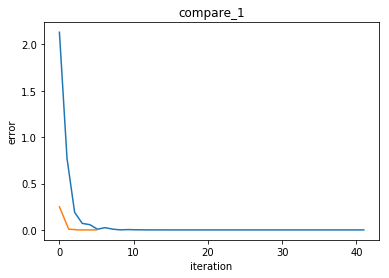

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import json
from collections import OrderedDict

def func(x):
    y = (x-1) * np.log(x) - 1
    return y

def deri_func(x):
    y = np.log(x) + 1 - (1/x)
    return y

def dichotomy(init_upper, init_lower):
    upper = init_upper
    lower = init_lower
    conv = 1e-12
    crit = func(upper) * func(lower)
    if crit >= 0:
        print("初期区間を選び直してください")
        return 0, 0, [0]
    error = conv + 1.0
    list_errors = list()
    count = 0
    while error > conv:
        center = (upper + lower) / 2.0
        # print(center)
        error = abs(func(center))
        # print(error)
        list_errors.append(error)
        crit_a = func(upper) * func(center)
        count += 1
        if crit_a < 0:
            lower = center
        else:
            upper = center
    return count, center, list_errors

def newton(init_point):
    point = init_point
    conv = 1e-12
    error = conv + 1.0
    list_errors = list()
    count = 0
    while error > conv:
        point = point - func(point)/deri_func(point)
        error = func(point)
        list_errors.append(error)
        count += 1
    return count, point, list_errors

def compare(init_lower, init_upper, title):
    count, ans, y = dichotomy(init_lower, init_upper)
    count2, ans2, y2 = newton((init_lower + init_upper) / 2)
    print(ans)
    print(ans2)
    x = np.linspace(0, len(y), len(y))
    x2 = np.linspace(0, len(y2), len(y2))
    plt.clf()
    plt.plot(x, y)
    plt.plot(x2, y2)
    plt.title(title)
    plt.xlabel("iteration")
    plt.ylabel("error")
    dict_anses[title + "/dichotomy/ans"] = ans
    dict_anses[title + "/dichotomy/count"] = count
    dict_anses[title + "/newton/ans"] = ans2
    dict_anses[title + "/newton/count"] = count2
        
if __name__ == "__main__":
    dict_anses = OrderedDict()
    compare(2, 5, "compare_1")
#     compare(0.01, 1, "compare_2")
#     compare(0.01, 5, "compare_3")
#     compare(0.05, 100000, "compare_4")

In [8]:
def func(x):
    y = (x-1) * np.log(x) - 1
    return y

def deri_func(x):
    y = np.log(x) + 1 - (1/x)
    return y
  
def newton(init_point):
    point = init_point
    conv = 1e-12
    error = conv + 1.0
    list_errors = list()
    count = 0
    while error > conv:
        point = point - func(point)/deri_func(point)
        error = func(point)
        list_errors.append(error)
        count += 1
    return count, point, list_errors

init_upper = 5
init_lower = 2
count, ans, y = newton((init_lower + init_upper) / 2)
print(ans)

2.23997788765655


In [21]:
list_cofs = np.array([1, 4, -3, 5]) #x^3 + 4x^2 + -3x + 5
div = 2 #x-2

# 組立除法
def synthetic_division(list_cofs, div):
  ans = list()
  res = 0
  memory = 0
  end = len(list_cofs) - 1
  for i, cof in enumerate(list_cofs):
    if i == 0:
      ans.append(cof)
      memory = cof * div
    elif i == end:
      res = memory + cof
    else:
      memory += cof
      ans.append(memory) 
      memory *= div
  return ans, res
  
# Pn-1に代入した答えを求める
def honer(list_cofs, div, xk):
  ans, res = synthetic_division(list_cofs, div)
  val = 0
  max_index = len(ans) - 1
  for i, cof in enumerate(ans):
    exp = max_index - i
    val += cof * (xk ** exp)
  return val
val = honer(list_cofs, div, 2)
print("Pn-1(xk):", val)

Pn-1(xk): 25


In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import json
from collections import OrderedDict

# 組立除法
def synthetic_division(list_cofs, div):
  ans = list()
  res = 0
  memory = 0
  end = len(list_cofs) - 1
  for i, cof in enumerate(list_cofs):
    if i == 0:
      ans.append(cof)
      memory = cof * div
    elif i == end:
      res = memory + cof
    else:
      memory += cof
      ans.append(memory) 
      memory *= div
  return ans, res
  
# Pn-1に代入した答えを求める
def honer(list_cofs, div, xk):
  ans, res = synthetic_division(list_cofs, div)
  val = 0
  max_index = len(ans) - 1
  for i, cof in enumerate(ans):
    exp = max_index - i
    val += cof * (xk ** exp)
  return val, ans

#Pnに代入した答えを求める
def func(list_cofs, xk):
  max_index = len(list_cofs) - 1
  val = 0
  for i, cof in enumerate(list_cofs):
    exp = max_index - i
    val += cof * (xk ** exp)
  return val

#newton法
def newton(init_point, list_cofs):
    point = init_point
    conv = 1e-11
    error = conv + 1.0
    list_errors = list()
    count = 0
    while error > conv:
      val, list_cofs_new = honer(list_cofs, point, point)
      point = point - func(list_cofs, point)/val
      error = abs(func(list_cofs, point))
      list_errors.append(error)
      count += 1
    return point, list_cofs_new

#初期条件
list_cofs = np.array([1, -99, 626, -626, 99, -1]) 
point = 5

for i in range(len(list_cofs)-1):
  point, list_cofs = newton(point, list_cofs)
  print("point", point)

point 5.517487909311953
point 1.0000000000000053
point 0.18124187456101679
point 0.010835381293603577
point 92.29043483123372


# 問題3

In [11]:
A = np.array([[1, 1, 1, 1, 1], [1, 2, 3, 4, 5], [1, 3, 6, 10, 15], [1, 4, 10, 20, 35], [1, 5, 15, 35, 70]])
np.linalg.eig(A)

(array([9.22904348e+01, 5.51748791e+00, 1.00000000e+00, 1.81241901e-01,
        1.08353591e-02]),
 array([[-0.01749127,  0.2429308 , -0.76604592,  0.57062825,  0.16803493],
        [-0.07491761,  0.48079135, -0.38302296, -0.55871858, -0.55168287],
        [-0.20547419,  0.61097757,  0.1641527 , -0.25291983,  0.70254695],
        [-0.45153768,  0.41302583,  0.43774052,  0.51785438, -0.40710376],
        [-0.86485576, -0.40735781, -0.21887026, -0.17342246,  0.09002546]]))

In [27]:
xk = np.array([0, 0, 0, 0, 1]).reshape(-1, 1)
xk1 = np.dot(A, xk)
lam = np.dot(xk.T, xk1)/np.dot(xk.T, xk)
print(lam)

[[70.]]


In [29]:
xk = np.array([0, 0, 0, 0, 1])
xk1 = np.dot(A, xk)
lam = np.dot(xk, xk1)/np.dot(xk, xk)
print(lam)

70.0


In [62]:
def bekijou(A, x0):
  x1 = np.dot(A, x0)
  lam1 = np.dot(x0, x1)/np.dot(x0, x0)
  x2 = np.dot(A, x1)
  lam2 = np.dot(x1, x2)/np.dot(x1, x1)
  xk = x2
  lamk = lam2
  error = 0
  conv = 1e-6

  while 1:
    xk1 = np.dot(A, xk)
    lamk1 = np.dot(xk, xk1)/np.dot(xk, xk)
    error = abs(lamk1 - lamk)
    xk = xk1
    lamk = lamk1
    if error < conv:
      u = xk1/lamk1
      e = u/np.sqrt(np.dot(u, u))
      break
  print("eig_vec", e)
  print("eig:", lamk1)
  return e, lamk1

A = np.array([[1, 1, 1, 1, 1], [1, 2, 3, 4, 5], [1, 3, 6, 10, 15], [1, 4, 10, 20, 35], [1, 5, 15, 35, 70]])
x0 = np.array([0, 0, 0, 0, 1])  
eig_vec, eig_val = bekijou(A, x0)

eig_vec [0.01749118 0.07491743 0.20547397 0.45153753 0.86485591]
eig: 92.29043482701172


In [79]:
def bekijou(A, x0):
  x1 = np.dot(A, x0)
  lam1 = np.dot(x0, x1)/np.dot(x0, x0)
  x2 = np.dot(A, x1)
  lam2 = np.dot(x1, x2)/np.dot(x1, x1)
  xk = x2
  lamk = lam2
  error = 0
  conv = 1e-6

  while 1:
    xk1 = np.dot(A, xk)
    lamk1 = np.dot(xk, xk1)/np.dot(xk, xk)
    error = abs(lamk1 - lamk)
    xk = xk1
    lamk = lamk1
    if error < conv:
      u = xk1/lamk1
      e = u/np.sqrt(np.dot(u, u))
      break
  print("eig_vec", e)
  print("eig:", lamk1)
  return e, lamk1

A = np.array([[1, 1, 1, 1, 1], [1, 2, 3, 4, 5], [1, 3, 6, 10, 15], [1, 4, 10, 20, 35], [1, 5, 15, 35, 70]])
x0 = np.array([0, 0, 0, 0, 1])  
eig_vec, eig_val = bekijou(A, x0)
end_index = len(A) - 1
for i in range(end_index):
  xx, yy = np.meshgrid(eig_vec, eig_vec)
  P = xx * yy
  A_new = A - eig_val * P
  eig_vec, eig_val = bekijou(A_new, x0)
  A = A_new

eig_vec [0.01749118 0.07491743 0.20547397 0.45153753 0.86485591]
eig: 92.29043482701172
eig_vec [-0.24292826 -0.48079048 -0.61097937 -0.41303005  0.40735336]
eig: 5.51748790786131
eig_vec [ 0.76603452  0.38304781 -0.16413396 -0.4377472   0.21886737]
eig: 0.9999999806357707
eig_vec [-0.57074584  0.55865556  0.25294992 -0.51778924  0.17338914]
eig: 0.18124190293213227
eig_vec [ 0.16809825 -0.55174485  0.70251889 -0.40704631  0.09000622]
eig: 0.010835359194188486
